In [1]:
import pandas as pd

# Replace 'your_file.csv' with the name of your uploaded file
df = pd.read_csv('/content/HR-Dataset.csv')

# Display the first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
# Renaming columns with a better description
df = df.rename(columns={'satisfaction_level': 'satisfaction',
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [3]:
# Moving the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [4]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Exemple pour voir le mappage des valeurs encodées
label_encoder = LabelEncoder()
df['department'] = label_encoder.fit_transform(df['department'])
print("Mapping for 'department':")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i} -> {class_label}")

df['salary'] = label_encoder.fit_transform(df['salary'])
print("\nMapping for 'salary':")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i} -> {class_label}")


Mapping for 'department':
0 -> IT
1 -> RandD
2 -> accounting
3 -> hr
4 -> management
5 -> marketing
6 -> product_mng
7 -> sales
8 -> support
9 -> technical

Mapping for 'salary':
0 -> high
1 -> low
2 -> medium


In [ ]:
df

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,7,1
1,1,0.80,0.86,5,262,6,0,0,7,2
2,1,0.11,0.88,7,272,4,0,0,7,2
3,1,0.72,0.87,5,223,5,0,0,7,1
4,1,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0,0.90,0.55,3,259,10,1,1,4,0
11996,0,0.74,0.95,5,266,10,0,1,4,0
11997,0,0.85,0.54,3,185,10,0,1,4,0
11998,0,0.33,0.65,3,172,10,0,1,5,0


In [6]:
import pandas as pd
from sklearn.utils import resample
import numpy as np

def oversample_minority_with_logic(df, target_column='turnover'):
    """
    Oversample the minority class with logical adjustments for turnover data.

    Parameters:
    - df (pd.DataFrame): The original DataFrame.
    - target_column (str): The target column indicating turnover.

    Returns:
    - pd.DataFrame: Balanced DataFrame with adjusted turnover data.
    """
    # Separate majority and minority classes
    df_majority = df[df[target_column] == 0]
    df_minority = df[df[target_column] == 1]

    # Apply logical adjustments to the minority class to create realistic turnover data
    df_minority_adjusted = df_minority.copy()

    # Adjustments for creating logical samples for turnover
    if 'satisfaction' in df.columns:
        # Generate satisfaction values between 0.1 and 0.4 with two decimal places
        df_minority_adjusted['satisfaction'] = np.round(np.random.uniform(0.1, 0.4, len(df_minority_adjusted)), 2)

    if 'projectCount' in df.columns:
        # Reduce project count by 1 or 2 to simulate lower engagement
        df_minority_adjusted['projectCount'] = df_minority_adjusted['projectCount'].apply(lambda x: max(1, x - np.random.choice([1, 2])))

    if 'averageMonthlyHours' in df.columns:
        # Adjust averageMonthlyHours to focus around 120 for lower values and 250 or 260 for higher values
        df_minority_adjusted['averageMonthlyHours'] = df_minority_adjusted['averageMonthlyHours'].apply(
            lambda x: 120 if x < 180 else np.random.choice([250, 260])
        )

    if 'yearsAtCompany' in df.columns:
        # Assign random years at company between 1 and 5 for more turnover-prone employees
        df_minority_adjusted['yearsAtCompany'] = np.random.randint(1, 6, len(df_minority_adjusted))

    if 'salary' in df.columns:
        # Set salary to 'low' if currently 'medium' to reflect typical turnover trends
        df_minority_adjusted['salary'] = df_minority_adjusted['salary'].apply(lambda x: 'low' if x == 'medium' else x)

    if 'workAccident' in df.columns:
        # Assign random values between 1 and 3 to simulate work accident history
        df_minority_adjusted['workAccident'] = np.random.randint(1, 4, len(df_minority_adjusted))

    # Oversample the adjusted minority class to balance the dataset
    df_minority_oversampled = resample(df_minority_adjusted,
                                       replace=True,
                                       n_samples=len(df_majority),
                                       random_state=42)

    # Combine majority class with oversampled minority class
    df_balanced = pd.concat([df_majority, df_minority_oversampled], ignore_index=True)

    return df_balanced


In [7]:
df_balanced = oversample_minority_with_logic(df, target_column='turnover')

In [8]:
df_balanced

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,0,0.58,0.74,4,215,3,0,0,7,1
1,0,0.82,0.67,2,202,3,0,0,7,1
2,0,0.45,0.69,5,193,3,0,0,7,1
3,0,0.78,0.82,5,247,3,0,0,7,1
4,0,0.49,0.60,3,214,2,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...
19995,1,0.40,0.45,1,120,1,1,0,7,2
19996,1,0.25,0.56,1,250,2,1,0,8,1
19997,1,0.12,0.79,4,260,3,3,0,1,1
19998,1,0.34,0.87,4,250,5,1,0,8,2


<ipython-input-9-689191b04885>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_0, x=col, palette="Blues", ax=axes[i, 0])
<ipython-input-9-689191b04885>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_1, x=col, palette="Reds", ax=axes[i, 1])
<ipython-input-9-689191b04885>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_0, x=col, palette="Blues", ax=axes[i, 0])
<ipython-input-9-689191b04885>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

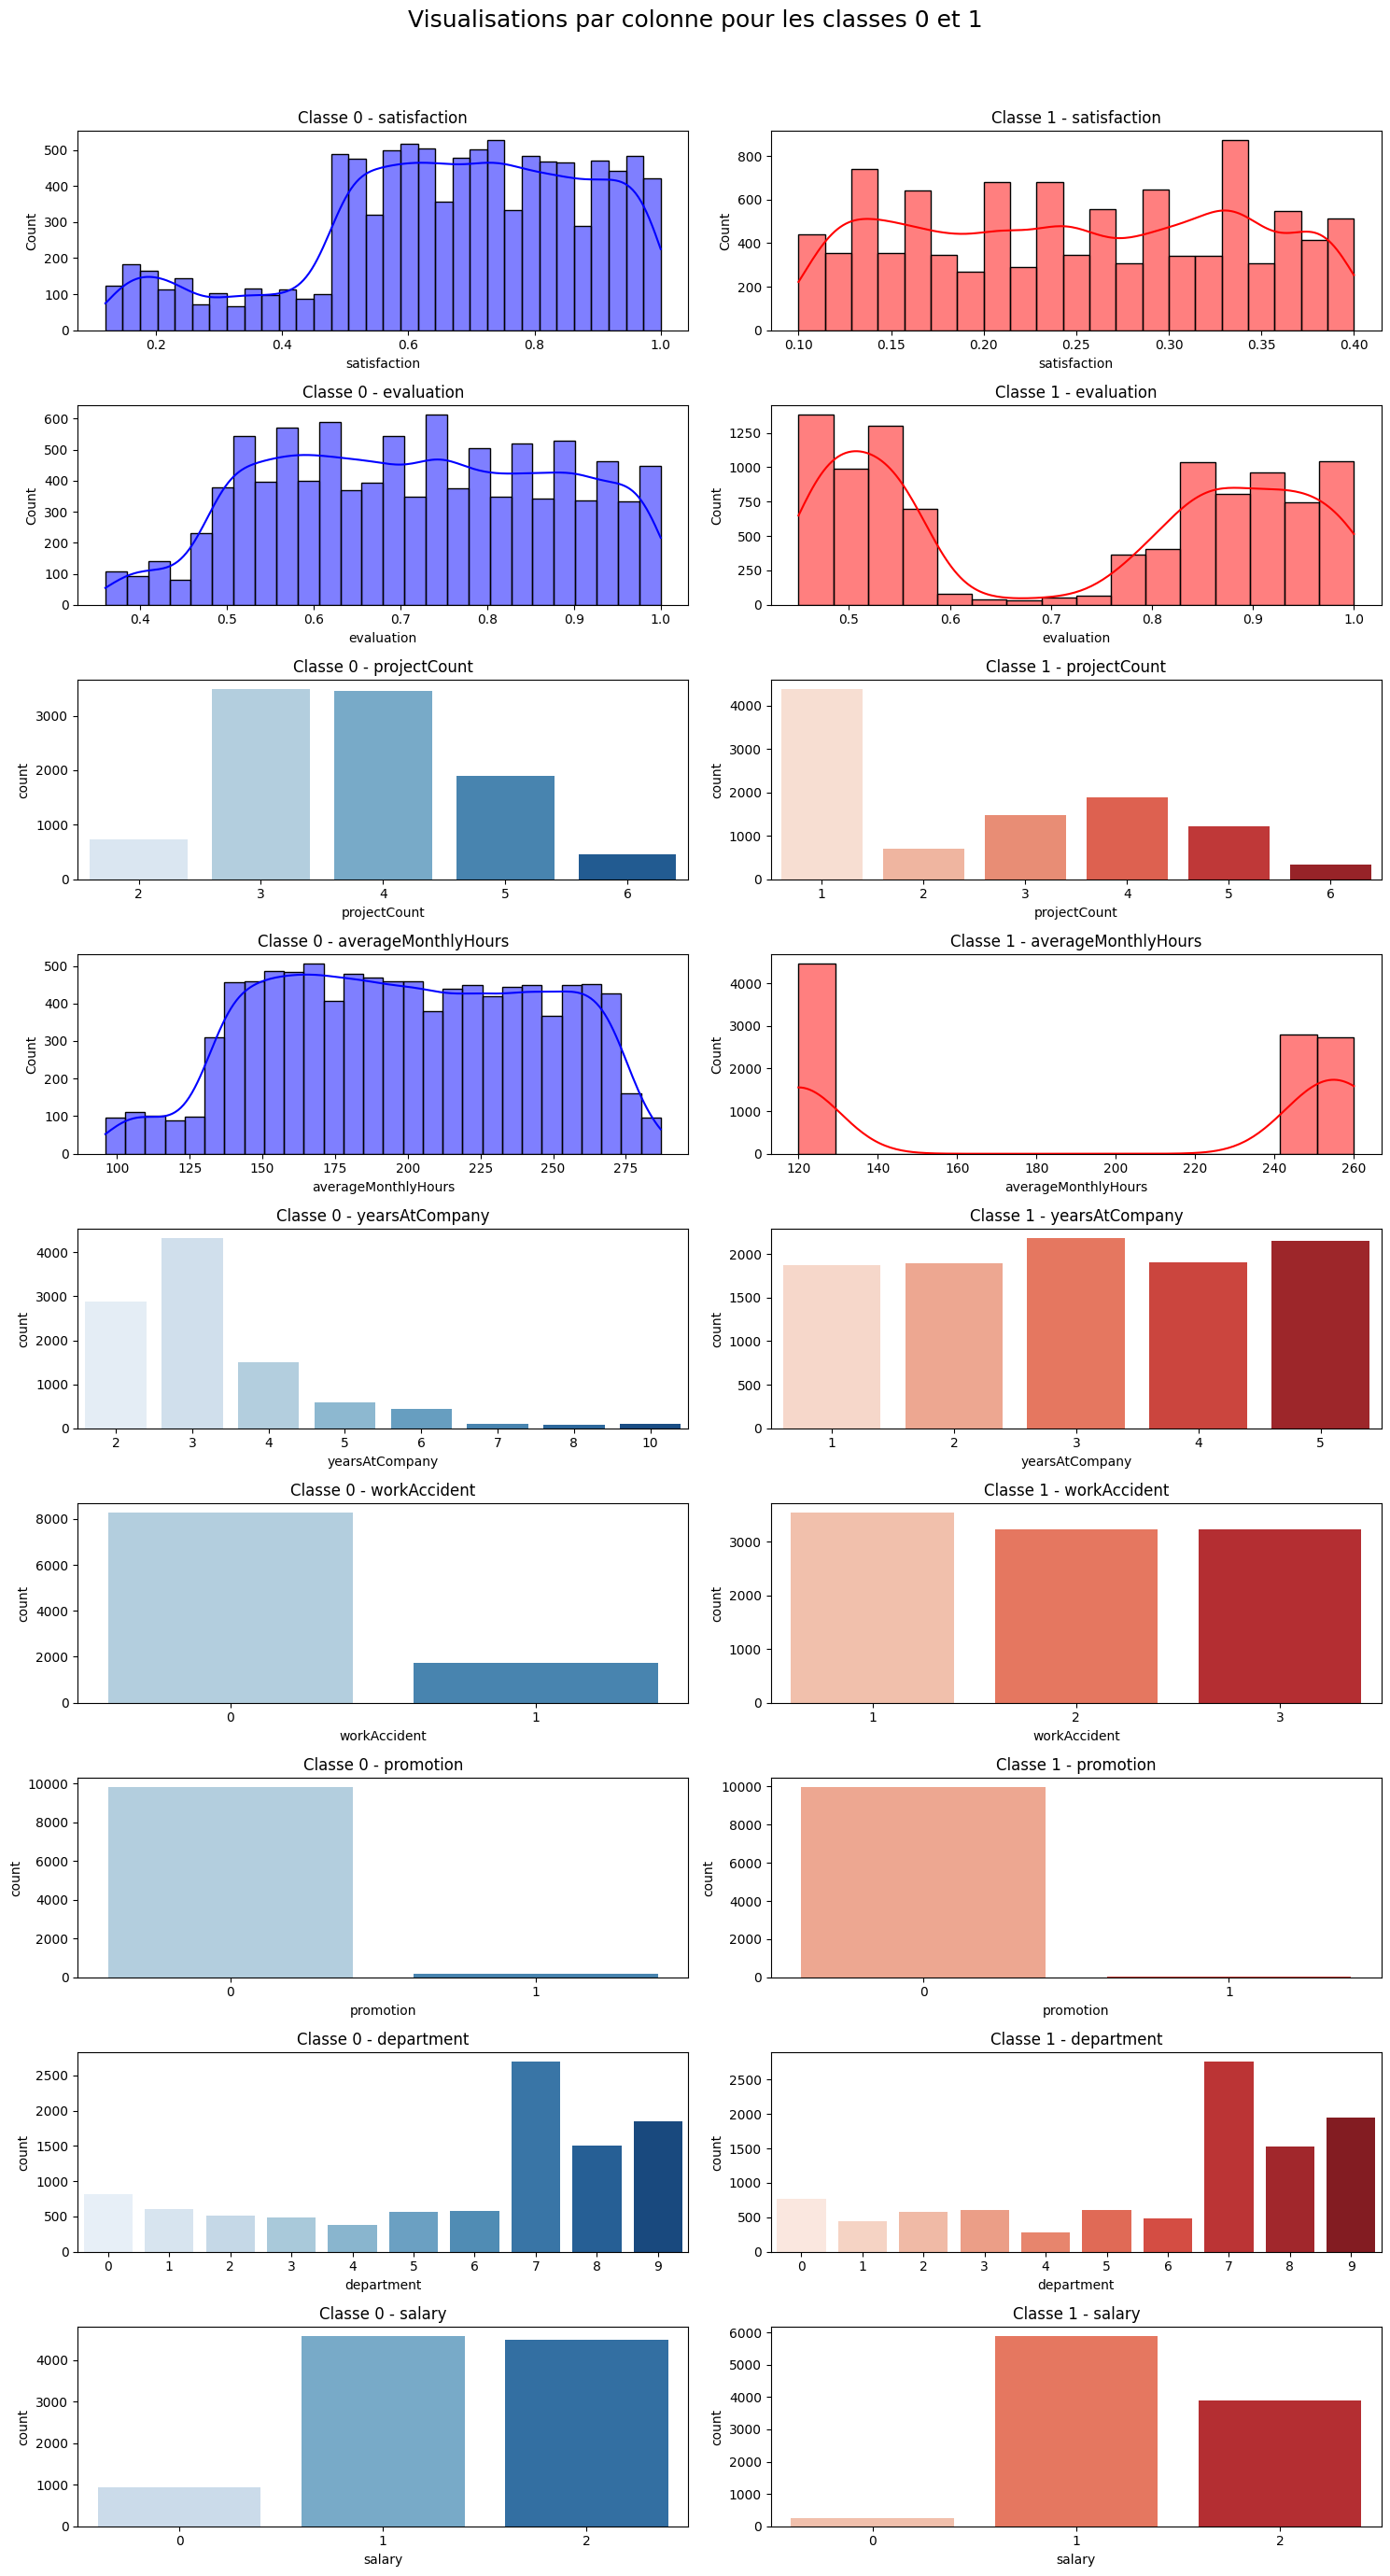

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger vos données
# data = pd.read_csv("your_data.csv")  # Remplacez par votre source de données

# Liste des colonnes à visualiser
columns = ["satisfaction", "evaluation", "projectCount", "averageMonthlyHours", "yearsAtCompany",
           "workAccident", "promotion", "department", "salary"]

# Diviser le dataset en classes 0 et 1
class_0 = df_balanced[df_balanced['turnover'] == 0]
class_1 = df_balanced[df_balanced['turnover'] == 1]

# Initialiser l'affichage
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(15, len(columns)*3))
fig.suptitle("Visualisations par colonne pour les classes 0 et 1", fontsize=18, y=1.02)

for i, col in enumerate(columns):
    # Visualisation de la classe 0
    if df_balanced[col].dtype == 'object' or len(df_balanced[col].unique()) <= 10:
        sns.countplot(data=class_0, x=col, palette="Blues", ax=axes[i, 0])
    else:
        sns.histplot(class_0[col], kde=True, color="blue", ax=axes[i, 0])
    axes[i, 0].set_title(f"Classe 0 - {col}")

    # Visualisation de la classe 1
    if df_balanced[col].dtype == 'object' or len(df_balanced[col].unique()) <= 10:
        sns.countplot(data=class_1, x=col, palette="Reds", ax=axes[i, 1])
    else:
        sns.histplot(class_1[col], kde=True, color="red", ax=axes[i, 1])
    axes[i, 1].set_title(f"Classe 1 - {col}")

# Ajustement des marges
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import pandas as pd

def adjust_class_0(df, target_column='turnover'):
    """
    Modifie aléatoirement les valeurs de 'promotion' et 'salary' dans la classe 0.
    La majorité des lignes de la classe 0 auront 'promotion' = 1 et 'salary' = 0.

    Parameters:
    - df (pd.DataFrame): Le DataFrame à ajuster.
    - target_column (str): La colonne cible indiquant la classe de turnover (0 ou 1).

    Returns:
    - pd.DataFrame: Le DataFrame avec les valeurs ajustées pour la classe 0.
    """
    # Filtrer les données pour la classe 0 (pas de turnover)
    df_class_0 = df[df[target_column] == 0].copy()

    # Appliquer des changements aléatoires sur les colonnes 'promotion' et 'salary'
    # Pour 'promotion', 80% des lignes de la classe 0 auront 'promotion' = 1
    df_class_0['promotion'] = np.random.choice([0, 1], p=[0.2, 0.8], size=len(df_class_0))

    # Pour 'salary', 80% des lignes de la classe 0 auront 'salary' = 0 (salaire élevé) et 20% auront 'salary' = 2 (moyen)
    df_class_0['salary'] = np.random.choice([0, 2], p=[0.8, 0.2], size=len(df_class_0))

    # Remplacer les lignes modifiées dans le DataFrame original
    df.update(df_class_0)

    return df


In [11]:
df_balanced = adjust_class_0(df_balanced, target_column='turnover')

In [12]:
df_balanced

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,0,0.58,0.74,4,215,3,0,1,7,0
1,0,0.82,0.67,2,202,3,0,1,7,0
2,0,0.45,0.69,5,193,3,0,1,7,2
3,0,0.78,0.82,5,247,3,0,1,7,0
4,0,0.49,0.60,3,214,2,0,1,7,0
...,...,...,...,...,...,...,...,...,...,...
19995,1,0.40,0.45,1,120,1,1,0,7,2
19996,1,0.25,0.56,1,250,2,1,0,8,1
19997,1,0.12,0.79,4,260,3,3,0,1,1
19998,1,0.34,0.87,4,250,5,1,0,8,2


In [13]:
def assign_gender(row):
    if row["turnover"] == 0:
        return np.random.choice([0, 1], p=[0.7, 0.3])  # 70% femmes, 30% hommes
    elif row["turnover"] == 1:
        return np.random.choice([0, 1], p=[0.3, 0.7])  # 30% femmes, 70% hommes

# Ajouter la colonne gender
df_balanced["gender"] = df_balanced.apply(assign_gender, axis=1)

# Vérification des proportions
class_0_gender = df_balanced[df_balanced["turnover"] == 0]["gender"].value_counts(normalize=True)
class_1_gender = df_balanced[df_balanced["turnover"] == 1]["gender"].value_counts(normalize=True)

print("Proportions pour la classe 0 (femmes: 0, hommes: 1):")
print(class_0_gender)
print("\nProportions pour la classe 1 (femmes: 0, hommes: 1):")
print(class_1_gender)

Proportions pour la classe 0 (femmes: 0, hommes: 1):
gender
0    0.6973
1    0.3027
Name: proportion, dtype: float64

Proportions pour la classe 1 (femmes: 0, hommes: 1):
gender
1    0.7021
0    0.2979
Name: proportion, dtype: float64


In [14]:
df_balanced

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,gender
0,0,0.58,0.74,4,215,3,0,1,7,0,1
1,0,0.82,0.67,2,202,3,0,1,7,0,0
2,0,0.45,0.69,5,193,3,0,1,7,2,0
3,0,0.78,0.82,5,247,3,0,1,7,0,0
4,0,0.49,0.60,3,214,2,0,1,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,0.40,0.45,1,120,1,1,0,7,2,0
19996,1,0.25,0.56,1,250,2,1,0,8,1,1
19997,1,0.12,0.79,4,260,3,3,0,1,1,1
19998,1,0.34,0.87,4,250,5,1,0,8,2,1


In [15]:
df_balanced.to_csv('train_dataset.csv', index=False)

<ipython-input-58-dd6862cf70b5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_0, x=col, palette="Blues", ax=axes[i, 0])
<ipython-input-58-dd6862cf70b5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_1, x=col, palette="Reds", ax=axes[i, 1])
<ipython-input-58-dd6862cf70b5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_0, x=col, palette="Blues", ax=axes[i, 0])
<ipython-input-58-dd6862cf70b5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

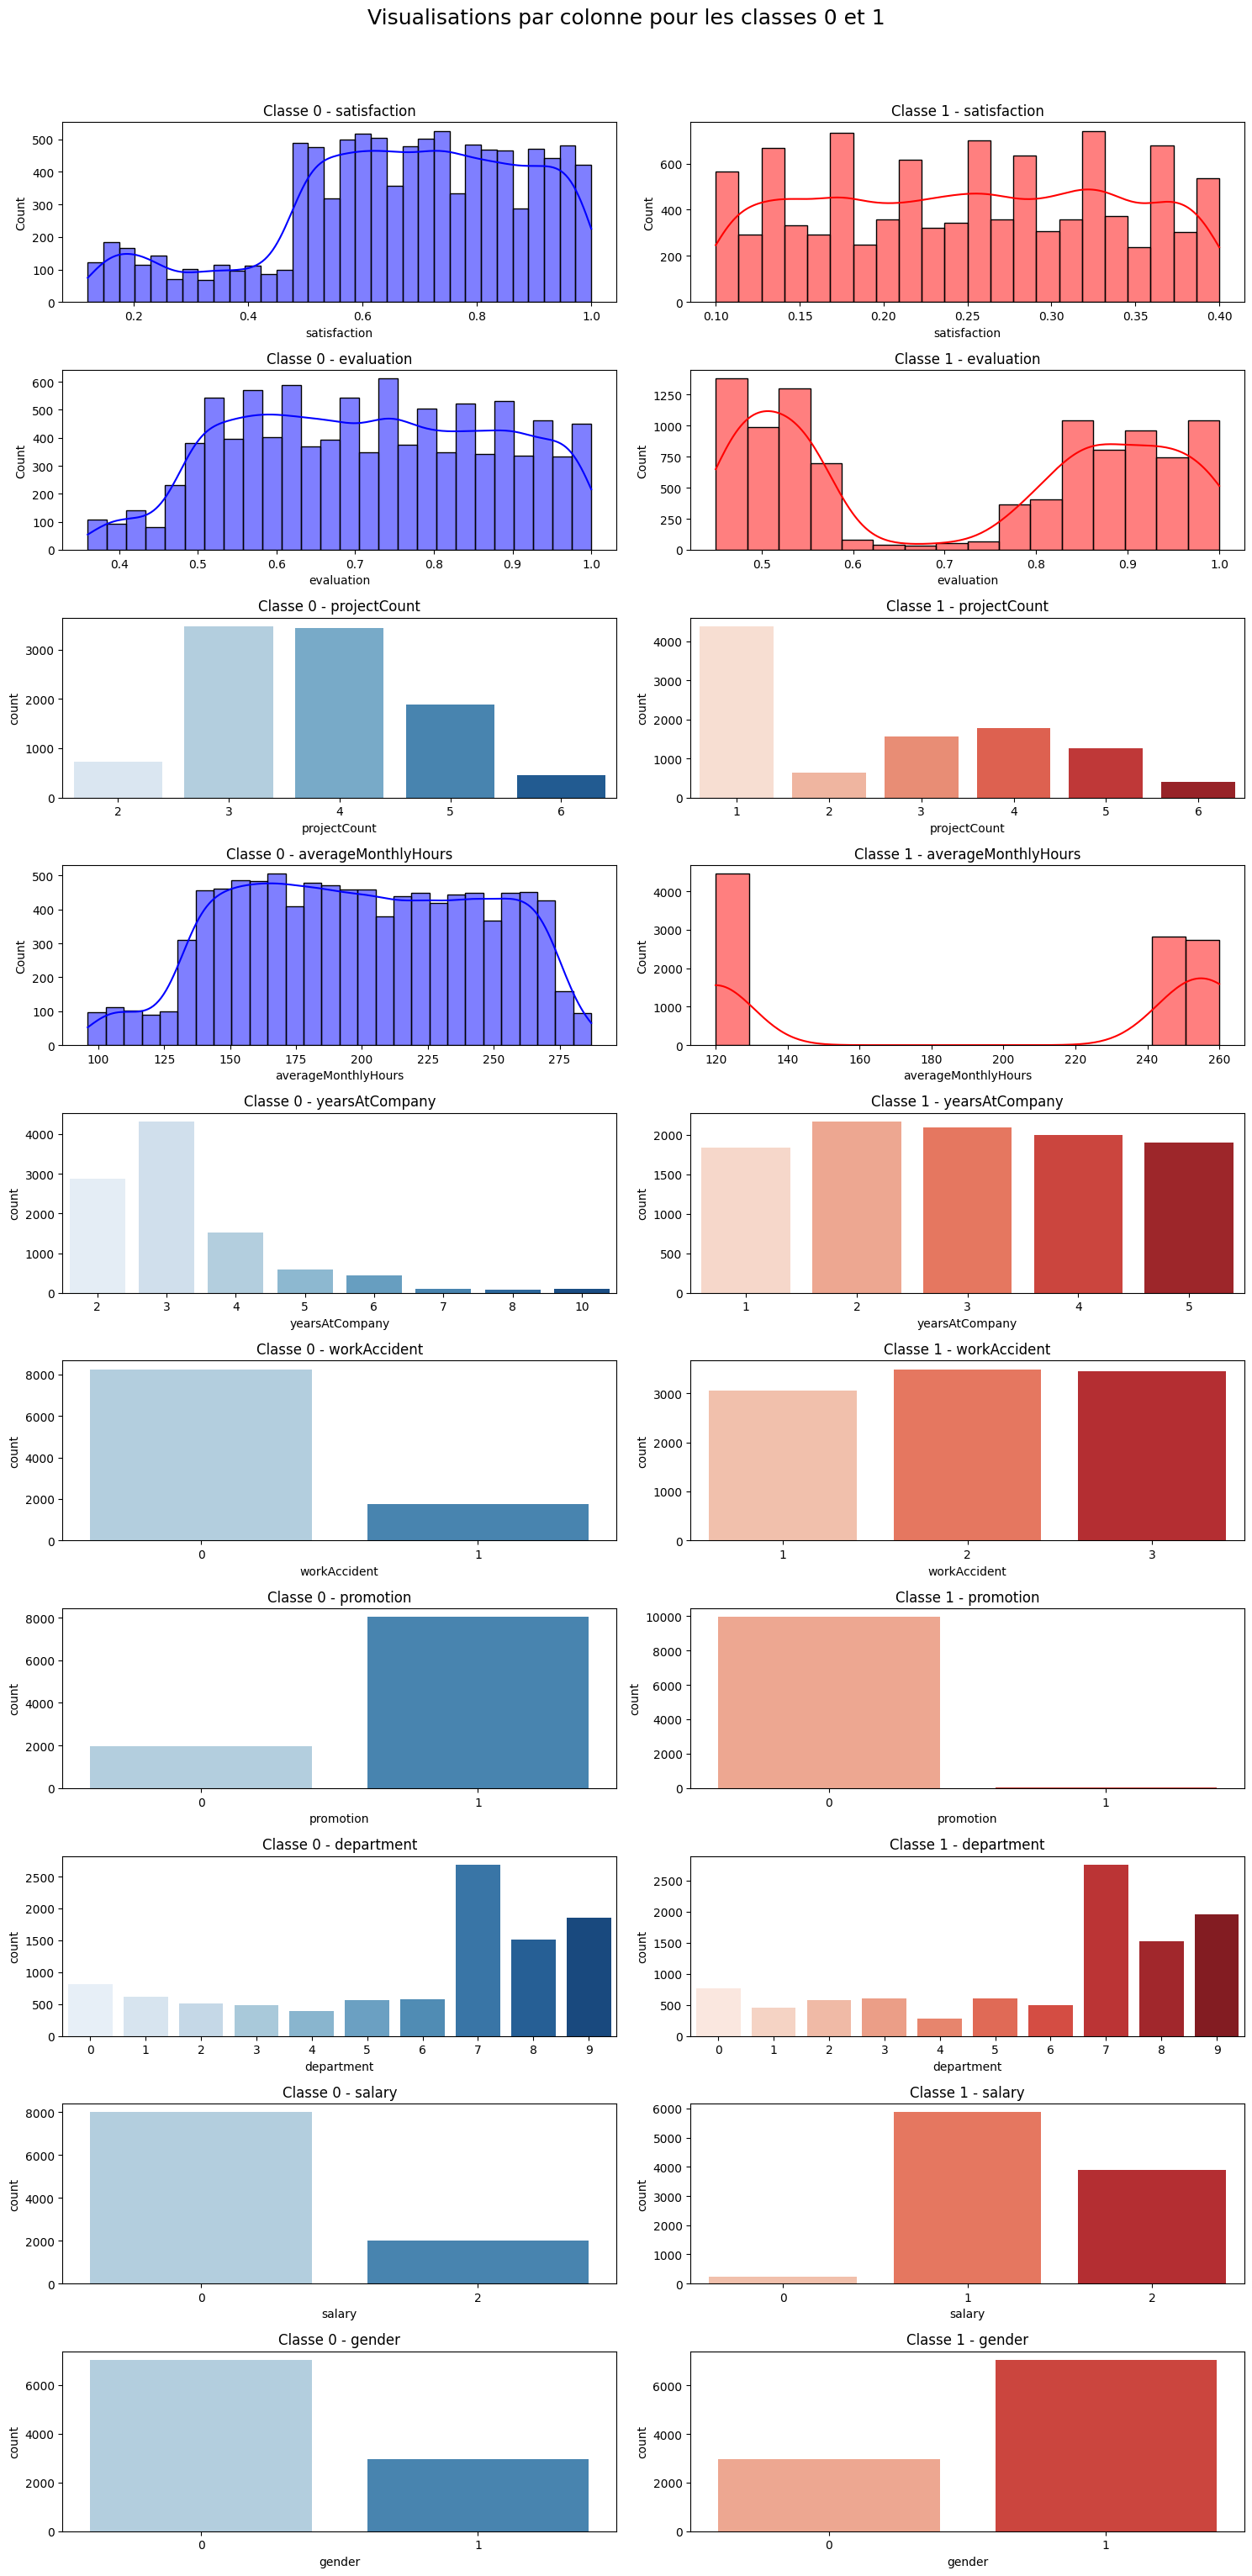

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger vos données
# data = pd.read_csv("your_data.csv")  # Remplacez par votre source de données

# Liste des colonnes à visualiser
columns = ["satisfaction", "evaluation", "projectCount", "averageMonthlyHours", "yearsAtCompany",
           "workAccident", "promotion", "department", "salary","gender"]

# Diviser le dataset en classes 0 et 1
class_0 = df_balanced[df_balanced['turnover'] == 0]
class_1 = df_balanced[df_balanced['turnover'] == 1]

# Initialiser l'affichage
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(15, len(columns)*3))
fig.suptitle("Visualisations par colonne pour les classes 0 et 1", fontsize=18, y=1.02)

for i, col in enumerate(columns):
    # Visualisation de la classe 0
    if df_balanced[col].dtype == 'object' or len(df_balanced[col].unique()) <= 10:
        sns.countplot(data=class_0, x=col, palette="Blues", ax=axes[i, 0])
    else:
        sns.histplot(class_0[col], kde=True, color="blue", ax=axes[i, 0])
    axes[i, 0].set_title(f"Classe 0 - {col}")

    # Visualisation de la classe 1
    if df_balanced[col].dtype == 'object' or len(df_balanced[col].unique()) <= 10:
        sns.countplot(data=class_1, x=col, palette="Reds", ax=axes[i, 1])
    else:
        sns.histplot(class_1[col], kde=True, color="red", ax=axes[i, 1])
    axes[i, 1].set_title(f"Classe 1 - {col}")

# Ajustement des marges
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df_balanced' is your DataFrame and 'turnover' is the target column

# Split the dataset into train, validation, and test sets
train, temp = train_test_split(df_balanced, test_size=0.4, random_state=123, stratify=df_balanced['turnover'])
validation, test = train_test_split(temp, test_size=0.5, random_state=123, stratify=temp['turnover'])

# Split each set into X (features) and y (target)
X_train = train.drop('turnover', axis=1)
y_train = train['turnover']
X_val = validation.drop('turnover', axis=1)
y_val = validation['turnover']
X_test = test.drop('turnover', axis=1)
y_test = test['turnover']

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=123),
    'Logistic Regression': LogisticRegression(random_state=123),
    'Support Vector Classifier': SVC(random_state=123)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set for the final evaluation
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))
    print("="*50)


Model: Random Forest
Validation Accuracy: 0.9985
Test Accuracy: 0.9992
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Model: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.9952
Test Accuracy: 0.9950
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2000
           1       0.99      1.00      1.00      2000

    accuracy                           0.99      4000
   macro avg       1.00      0.99      0.99      4000
weighted avg       1.00      0.99      0.99      4000

Model: Support Vector Classifier
Validation Accuracy: 0.8815
Test Accuracy: 0.8908
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      2000
           1       0.82      1.00      0.90      2000

    accuracy                           0.89      4000
   macro avg       0.91      0.89      0.89      4000
weighted avg       0.91      0.89      0.89      4000



In [ ]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
from sklearn.model_selection import cross_val_score

# Effectuer une validation croisée pour évaluer le modèle Random Forest
def cross_validate_random_forest(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("Scores de validation croisée:", scores)
    print("Score moyen:", scores.mean())
    return scores.mean()

# Utiliser la validation croisée sur le modèle Random Forest ajusté
cross_validate_random_forest(rf_model, X_train, y_train)


Scores de validation croisée: [1.         0.99958333 0.99958333 1.         1.        ]
Score moyen: 0.9998333333333334


0.9998333333333334

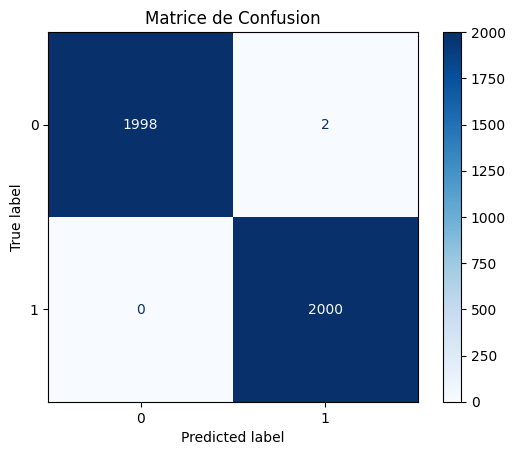

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualiser la matrice de confusion
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Afficher la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matrice de Confusion')
    plt.show()

# Afficher la matrice de confusion pour le modèle
plot_confusion_matrix(rf_model, X_test, y_test)



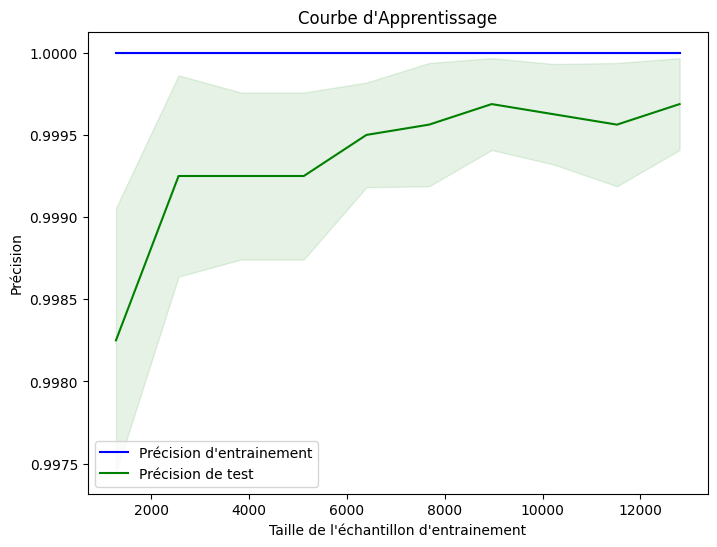

In [ ]:
from sklearn.model_selection import learning_curve

# Visualiser la courbe d'apprentissage
def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculer la moyenne et l'écart-type des scores
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    # Tracer la courbe d'apprentissage
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Précision d\'entrainement', color='blue')
    plt.plot(train_sizes, test_mean, label='Précision de test', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
    plt.xlabel('Taille de l\'échantillon d\'entrainement')
    plt.ylabel('Précision')
    plt.title('Courbe d\'Apprentissage')
    plt.legend()
    plt.show()

# Afficher la courbe d'apprentissage pour le modèle
plot_learning_curve(rf_model, X_train, y_train)


In [ ]:
input_values = {
    'satisfaction': 0.7,          # Satisfaction de l'employé
    'evaluation': 0.1,           # Évaluation de performance
    'projectCount': 6,           # Nombre de projets
    'averageMonthlyHours': 220, # Moyenne des heures de travail par mois
    'yearsAtCompany': 6,        # Nombre d'années dans l'entreprise
    'workAccident': True,        # Accident de travail (True/False)
    'promotion': True,            # Promotion récente (True/False)
    'department': 7,              # Département (Sales)
    'salary': 1,                  # Salaire (low = 1, medium = 2, high = 0)
    'gender': 1                   # Sexe (homme = 1, femme = 0)
}

# Convert input values into a DataFrame with the same structure as X_train
input_df = pd.DataFrame([input_values])

probabilities = rf_model.predict_proba(input_df)

# Extract the probability of class 1 (turnover)
turnover_probability = probabilities[0][1]  # probability for class 1 (turnover)

# Convert the probability to a percentage
turnover_percentage = turnover_probability * 100

# Display the result
print(f"The probability of turnover is: {turnover_percentage:.2f}%")

The probability of turnover is: 8.00%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Exemple de génération de données d'entraînement simulées pour entraîner le modèle
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Division en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Créer et entraîner le modèle RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fonction de calcul du turnover risk avec ajustement logique






RandomForestClassifier(random_state=42)

In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'rf_model.pkl')
print("Model saved as 'optimized_rf_model.pkl'")

Model saved as 'optimized_rf_model.pkl'


In [ ]:
def calculate_turnover_risk(satisfaction, evaluation, project_count, average_monthly_hours,
                            years_at_company, work_accident, promotion, department, salary, gender):
    # Initialisation du risque de turnover
    turnover_risk = 0.1  # Risque de base

    # Mapping pour department et salary
    department_mapping = {
        0: "IT", 1: "RandD", 2: "accounting", 3: "hr", 4: "management",
        5: "marketing", 6: "product_mng", 7: "sales", 8: "support", 9: "technical"
    }
    salary_mapping = {0: "high", 1: "low", 2: "medium"}

    # Conversion de department et salary en valeurs textuelles
    department_text = department_mapping.get(department, "unknown")
    salary_text = salary_mapping.get(salary, "medium")

    # Ajustement basé sur la satisfaction
    turnover_risk += (1 - satisfaction) * 0.3

    # Ajustements basés sur le department
    if department_text in ['management', 'hr','technical','support','accounting']:
        turnover_risk -= 0.05
    elif department_text in ['sales', 'IT','marketing','RandD','product_mng']:
        turnover_risk += 0.05

    # Ajustement basé sur les années d'expérience
    experience_factor = 0
    if years_at_company < 3:
        experience_factor = 0.1  # Moins d'expérience augmente le risque
    elif 3 <= years_at_company <= 5:
        experience_factor = 0.2  # Expérience modérée a un impact plus important
    elif years_at_company > 5:
        experience_factor = -0.1  # Plus d'expérience réduit le risque

    # Ajustement supplémentaire basé sur le salaire
    salary_factor = 0
    if salary_text == 'low':
        salary_factor = 0.3  # Salaire bas augmente plus le risque si expérience est élevée
        if years_at_company > 3:
            experience_factor += 0.3  # Si l'expérience est plus de 3 ans et salaire bas, le risque augmente
    elif salary_text == 'medium':
        salary_factor = 0.1  # Salaire moyen augmente légèrement le risque
        if years_at_company > 5:
            experience_factor += 0.05  # Si l'expérience est plus de 5 ans et salaire moyen, le risque augmente davantage
    elif salary_text == 'high':
        salary_factor = -0.05  # Salaire élevé réduit légèrement le risque

    # Appliquer les facteurs combinés
    turnover_risk += experience_factor + salary_factor

    # Ajustements basés sur le genre
    turnover_risk += 0.02 if gender == 1 else -0.02  # 1 pour homme, 0 pour femme

    # Ajustements pour les heures de travail mensuelles
    if average_monthly_hours < 120 or average_monthly_hours > 230:
        turnover_risk += 0.05

    # Ajustement basé sur l'évaluation de performance
    turnover_risk -= evaluation * 0.2  # Moins l'évaluation est bonne, plus le risque augmente

    # Ajustements basés sur le salaire et la promotion
    if salary_text == 'low':
        turnover_risk += 0.1
        if not promotion:
            turnover_risk += 0.1  # Augmentation du risque si pas de promotion récente
    elif salary_text == 'medium':
        turnover_risk += 0.05
    else:  # High salary
        turnover_risk -= 0.2

    # Accident de travail
    if work_accident:
        turnover_risk += 0.05

    # Nombre de projets
    if project_count > 5:  # Plus de 5 projets augmente le risque
        turnover_risk += 0.05
        if salary_text == 'low' and not promotion:
            turnover_risk += 0.1  # Double pénalité si le salaire est bas et pas de promotion
    elif project_count < 3:  # Moins de 3 projets diminue légèrement le risque
        turnover_risk -= 0.05

    # Limiter le risque de turnover entre 0% et 100%
    turnover_risk_percentage = max(0, min(turnover_risk * 100, 100))

    return turnover_risk_percentage


In [ ]:
# Fonction pour appliquer l'ajustement basé sur la prédiction du modèle
def apply_model_and_adjust(input_values, model):
    # Convertir les valeurs d'entrée en DataFrame
    input_df = pd.DataFrame([input_values])

    # Prédire la probabilité du turnover avec le modèle
    probabilities = model.predict_proba(input_df)

    # Extraire la probabilité de turnover (classe 1)
    turnover_probability = probabilities[0][1]  # probabilité pour la classe 1 (turnover)

    # Convertir la probabilité en pourcentage
    turnover_percentage = turnover_probability * 100

    # Appliquer la logique d'ajustement
    adjusted_turnover_percentage = calculate_turnover_risk(
        input_values['satisfaction'],
        input_values['evaluation'],
        input_values['projectCount'],
        input_values['averageMonthlyHours'],
        input_values['yearsAtCompany'],
        input_values['workAccident'],
        input_values['promotion'],
        input_values['department'],
        input_values['salary'],
        input_values['gender']
    )

    # Retourner les deux résultats
    return turnover_percentage, adjusted_turnover_percentage

In [ ]:
# Exemple de données d'entrée
input_values = {
    'satisfaction': 0.7,          # Satisfaction de l'employé
    'evaluation': 0.9,           # Évaluation de performance
    'projectCount': 6,           # Nombre de projets
    'averageMonthlyHours': 220,  # Moyenne des heures de travail par mois
    'yearsAtCompany': 6,         # Nombre d'années dans l'entreprise
    'workAccident': True,        # Accident de travail (True/False)
    'promotion': True,           # Promotion récente (True/False)
    'department': 7,             # Département (Sales)
    'salary': 0,                 # Salaire (low = 1, medium = 2, high = 0)
    'gender': 1                  # Sexe (homme = 1, femme = 0)
}

# Appliquer l'ajustement sur la sortie du modèle
turnover_probability, adjusted_turnover_percentage = apply_model_and_adjust(input_values, rf_model)

# Affichage des résultats
print(f"La probabilité de turnover (modèle) est : {turnover_probability:.2f}%")
print(f"La probabilité de turnover (ajustée logiquement) est : {adjusted_turnover_percentage:.2f}%")

La probabilité de turnover (modèle) est : 66.00%
La probabilité de turnover (ajustée logiquement) est : 0.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
def combine_probabilities(model_probability, adjusted_probability, model_weight=0.2, adjustment_weight=0.8):
    # Calculer la combinaison pondérée des deux probabilités avec plus de poids sur l'ajustement logique
    combined_probability = model_weight * model_probability + adjustment_weight * adjusted_probability
    return combined_probability


# Appliquer la combinaison avec plus de poids sur la probabilité ajustée
combined_turnover_probability = combine_probabilities(turnover_probability, adjusted_turnover_percentage)

# Affichage du résultat combiné
print(f"La probabilité combinée de turnover est : {combined_turnover_probability:.2f}%")


La probabilité combinée de turnover est : 13.20%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser le modèle Random Forest
rf = RandomForestClassifier(random_state=123)

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Créer le modèle avec les meilleurs paramètres trouvés
optimized_rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=123
)

# Entraîner le modèle optimisé
optimized_rf_model.fit(X_train, y_train)

# Évaluer la performance sur les données de test
y_pred = optimized_rf_model.predict(X_test)
accuracy = optimized_rf_model.score(X_test, y_test)

print("Accuracy of the optimized model:", accuracy)


Accuracy of the optimized model: 0.9995


In [ ]:
!pip install joblib


In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'rf_model.pkl')
print("Model saved as 'optimized_rf_model.pkl'")


Model saved as 'optimized_rf_model.pkl'


In [ ]:
# Load the model from the file
loaded_rf_model = joblib.load('optimized_rf_model.pkl')

# Use the loaded model to make predictions or evaluate
y_pred_loaded = loaded_rf_model.predict(X_test)
accuracy_loaded = loaded_rf_model.score(X_test, y_test)

print("Accuracy of the loaded model:", accuracy_loaded)


Accuracy of the loaded model: 0.9984689413823272


In [ ]:
def calculate_turnover_risk(satisfaction, evaluation, project_count, average_monthly_hours,
                            years_at_company, work_accident, promotion, department, salary, gender):
    # Initialisation du risque de turnover
    turnover_risk = 0.1  # Risque de base

    # Mapping pour department et salary
    department_mapping = {
        0: "IT", 1: "RandD", 2: "accounting", 3: "hr", 4: "management",
        5: "marketing", 6: "product_mng", 7: "sales", 8: "support", 9: "technical"
    }
    salary_mapping = {0: "high", 1: "low", 2: "medium"}

    # Conversion de department et salary en valeurs textuelles
    department_text = department_mapping.get(department, "unknown")
    salary_text = salary_mapping.get(salary, "medium")

    # Ajustement basé sur la satisfaction
    turnover_risk += (1 - satisfaction) * 0.3

    # Ajustements basés sur le department
    if department_text in ['management', 'hr','technical','support','accounting']:
        turnover_risk -= 0.05
    elif department_text in ['sales', 'IT','marketing','RandD','product_mng']:
        turnover_risk += 0.05

    experience_factor = 0
    if years_at_company < 3:
        experience_factor = 0.1  # Moins d'expérience augmente le risque
    elif 3 <= years_at_company <= 5:
        experience_factor = 0.2  # Expérience modérée a un impact plus important
    elif years_at_company > 5:
        experience_factor = -0.1  # Plus d'expérience réduit le risque

    # Ajustement supplémentaire basé sur le salaire
    salary_factor = 0
    if salary == 1:  # Comparaison avec l'indice numérique
        salary_factor = 0.2  # Salaire bas augmente plus le risque si expérience est élevée
        if years_at_company > 3:
            experience_factor += 0.2  # Si l'expérience est plus de 3 ans et salaire bas, le risque augmente
    elif salary == 2:
        salary_factor = 0.1  # Salaire moyen augmente légèrement le risque
        if years_at_company > 5:
            experience_factor += 0.05  # Si l'expérience est plus de 5 ans et salaire moyen, le risque augmente davantage
    elif salary == 0:
        salary_factor = -0.05  # Salaire élevé réduit légèrement le risque

    # Appliquer les facteurs combinés
    turnover_risk += experience_factor + salary_factor

    # Genre
    turnover_risk += 0.02 if gender == 1 else -0.02  # 1 pour homme, 0 pour femme

    # Ajustements pour les heures de travail mensuelles
    if average_monthly_hours < 120 or average_monthly_hours > 230:
        turnover_risk += 0.05

    # Ajustement basé sur l'évaluation de performance
    turnover_risk += (1 - evaluation) * 0.2

    # Ajustements basés sur le salaire et la promotion
    if salary_text == 'low':
        turnover_risk += 0.1
        if not promotion:
            turnover_risk += 0.1  # Augmentation du risque si pas de promotion récente
    elif salary_text == 'medium':
        turnover_risk += 0.05
    else:  # High salary
        turnover_risk -= 0.2

    # Accident de travail
    if work_accident:
        turnover_risk += 0.05

    # Nombre de projets
    if project_count > 5:  # Plus de 5 projets augmente le risque
        turnover_risk += 0.05
        if salary_text == 'low' and not promotion:
            turnover_risk += 0.1  # Double pénalité si le salaire est bas et pas de promotion
    elif project_count < 3:  # Moins de 3 projets diminue légèrement le risque
        turnover_risk -= 0.05

    # Limiter le risque de turnover entre 0% et 100%
    turnover_risk_percentage = max(0, min(turnover_risk * 100, 100))

    return turnover_risk_percentage

In [ ]:
input_values = {
    'satisfaction': 0.7,          # Satisfaction de l'employé
    'evaluation': 0.1,           # Évaluation de performance
    'project_count': 6,           # Nombre de projets
    'average_monthly_hours': 220, # Moyenne des heures de travail par mois
    'years_at_company': 6,        # Nombre d'années dans l'entreprise
    'work_accident': True,        # Accident de travail (True/False)
    'promotion': True,            # Promotion récente (True/False)
    'department': 7,              # Département (Sales)
    'salary': 1,                  # Salaire (low = 1, medium = 2, high = 0)
    'gender': 1                   # Sexe (homme = 1, femme = 0)
}

# Calculer le turnover risk avec les entrées spécifiées
turnover_risk = calculate_turnover_risk(**input_values)
print(f"Probabilité de turnover: {turnover_risk:.2f}%")

Probabilité de turnover: 94.00%
